In [2]:
import subprocess
import nltk

# Install packages
subprocess.check_call(['pip', 'install', 'nltk'])
subprocess.check_call(['pip', 'install', 'pyLDAvis'])
subprocess.check_call(['pip', 'install', 'pyngrok'])
subprocess.check_call(['pip', 'install', 'plotly', 'dash', 'dash-bootstrap-components', 'gensim'])
subprocess.check_call(['pip', 'install', 'gitpython'])

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

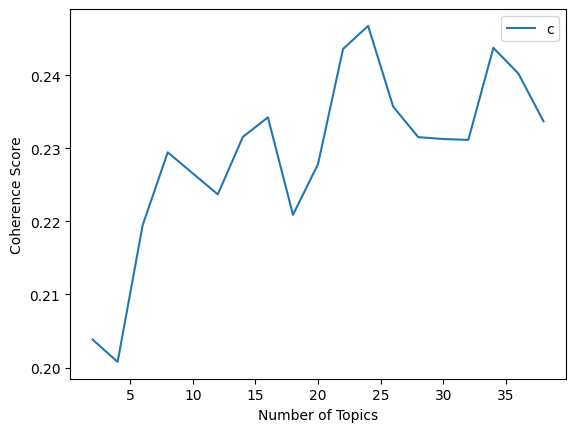

Topic: 0 
Words: 0.005*"wife" + 0.005*"adèle" + 0.005*"girls" + 0.005*"circumstances" + 0.005*"please" + 0.004*"looks" + 0.004*"forget" + 0.004*"fortune" + 0.004*"sir." + 0.004*"countenance"
Topic: 1 
Words: 0.005*"adèle" + 0.005*"mrs._fairfax" + 0.004*"ladies" + 0.004*"please" + 0.004*"thornfield" + 0.004*"beautiful" + 0.004*"sir." + 0.004*"french" + 0.004*"countenance" + 0.004*"grace"
Topic: 2 
Words: 0.019*"children" + 0.018*"lowood" + 0.018*"dare" + 0.017*"sir." + 0.016*"road" + 0.014*"finished" + 0.014*"send" + 0.013*"candle" + 0.013*"rain" + 0.012*"meet"
Topic: 3 
Words: 0.050*"sir." + 0.036*"me." + 0.031*"bonnet" + 0.030*"please" + 0.025*"dont" + 0.024*"talking" + 0.021*"forehead" + 0.021*"circumstances" + 0.021*"fortune" + 0.020*"money"
Topic: 4 
Words: 0.030*"sir." + 0.026*"glass" + 0.019*"arm" + 0.019*"trees" + 0.019*"suddenly" + 0.019*"wife" + 0.015*"discovered" + 0.015*"knee" + 0.015*"led" + 0.015*"rain"
Topic: 5 
Words: 0.055*"stand" + 0.037*"upstairs" + 0.037*"four" + 0.0


Topic Topic 0:
Chapter 1: Probability = 0.0007
Chapter 2: Probability = 0.0004
Chapter 3: Probability = 0.0004
Chapter 4: Probability = 0.0002
Chapter 5: Probability = 0.0002
Chapter 6: Probability = 0.0005
Chapter 7: Probability = 0.0003
Chapter 8: Probability = 0.0004
Chapter 9: Probability = 0.0003
Chapter 10: Probability = 0.0003
Chapter 11: Probability = 0.0001
Chapter 12: Probability = 0.0002
Chapter 13: Probability = 0.0002
Chapter 14: Probability = 0.0003
Chapter 15: Probability = 0.0003
Chapter 16: Probability = 0.0003
Chapter 17: Probability = 0.0001
Chapter 18: Probability = 0.0002
Chapter 19: Probability = 0.0003
Chapter 20: Probability = 0.0002
Chapter 21: Probability = 0.0001
Chapter 22: Probability = 0.0004
Chapter 23: Probability = 0.0003
Chapter 24: Probability = 0.0002
Chapter 25: Probability = 0.0002
Chapter 26: Probability = 0.0003
Chapter 27: Probability = 0.0001
Chapter 28: Probability = 0.0002
Chapter 29: Probability = 0.0003
Chapter 30: Probability = 0.0004
Cha

In [3]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from gensim import corpora, models
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import plotly.express as px
import pyLDAvis
import pyLDAvis.gensim_models as genvis


# Read the file
filename = '/content/drive/MyDrive/DataVisualization2024/jane_eyre.txt'
try:
    with open(filename, 'r', encoding='utf8') as f:
        text = f.read()
except:
    with open(filename, 'r', encoding='ISO-8859-1') as f:
        text = f.read()

# Define the preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words("english"))
    custom_stopwords = {"mrs", "mr", "miss", "said", "sir", "one", "would", "could", "said", "-"}
    stop_words.update(custom_stopwords)

    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = re.sub(r'\n', ' ', text)
    text = re.sub("_", "", text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if not word in stop_words]
    return tokens

# Split the text into chapters
chapters = text.split('CHAPTER ')[1:-1]

# Tokenize chapters
tokenized_chapters = [preprocess(chapter) for chapter in chapters]

# Build bigrams and trigrams
bigram = Phrases(tokenized_chapters, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_chapters], threshold=100)

tokenized_chapters = [trigram[bigram[chapter]] for chapter in tokenized_chapters]

# Create dictionary and corpus
dictionary = Dictionary(tokenized_chapters)
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(chapter) for chapter in tokenized_chapters]

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiments for each chapter
chapter_sentiments = [sia.polarity_scores(' '.join(chapter))['compound'] for chapter in tokenized_chapters]

# Label chapters based on sentiment
labels = ['positive' if sentiment >= 0.5 else 'negative' if sentiment <= -0.5 else 'neutral' for sentiment in chapter_sentiments]

# Combine chapters with their labels
chapters_with_labels = list(zip(tokenized_chapters, labels))

### Step 2: Tune LDA Model

# Find the optimal number of topics using coherence score
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_chapters, start=2, limit=40, step=2)

# Plot coherence scores
import matplotlib.pyplot as plt

x = range(2, 40, 2)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
num_topics = optimal_model.num_topics

# Display the topics
for idx, topic in optimal_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

### Step 3: Enhanced Visualizations

# Prepare data for pyLDAvis
vis = genvis.prepare(optimal_model, corpus, dictionary)

# Save the visualization as an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')

### Finding Top 5 Positive and Negative Topics

# Calculate average sentiment scores for each topic
topic_sentiments = np.zeros(num_topics)
topic_token_counts = np.zeros(num_topics)
topic_chapter_counts = np.zeros(num_topics)

for i, (chapter, label) in enumerate(chapters_with_labels):
    topic_distribution = optimal_model.get_document_topics(corpus[i], minimum_probability=0)
    for topic_id, probability in topic_distribution:
        if probability > 0:
            sentiment = sia.polarity_scores(' '.join(chapter))['compound']
            topic_sentiments[topic_id] += sentiment * probability
            topic_token_counts[topic_id] += len(chapter) * probability
            topic_chapter_counts[topic_id] += probability

# Normalize the sentiment scores
average_topic_sentiments = topic_sentiments / np.where(topic_chapter_counts == 0, 1, topic_chapter_counts)

# Prepare the data for Plotly
data = {
    'Topic': np.arange(num_topics),
    'Average Sentiment Score': average_topic_sentiments,
    'Log Proportion of Tokens': np.log1p(topic_token_counts / topic_token_counts.sum()),
    'Token Proportion': topic_token_counts / topic_token_counts.sum(),
    'Number of Chapters': topic_chapter_counts
}

df = pd.DataFrame(data)

# Filter out topics with zero counts in all metrics
df = df[(df['Number of Chapters'] > 0) | (df['Token Proportion'] > 0) | (df['Average Sentiment Score'] != 0)]

# Define color based on sentiment
def get_color(score):
    if score >= 0.5:
        return 'blue'
    elif score <= -0.5:
        return 'red'
    else:
        return 'lightgrey'

df['Color'] = df['Average Sentiment Score'].apply(get_color)

# Find the top 5 positive and negative topics
top_positive_topics = df.nlargest(5, 'Average Sentiment Score')
top_negative_topics = df.nsmallest(5, 'Average Sentiment Score')

print("\nTop 5 Positive Topics:")
print(top_positive_topics[['Topic', 'Average Sentiment Score', 'Token Proportion', 'Number of Chapters']])

print("\nTop 5 Negative Topics:")
print(top_negative_topics[['Topic', 'Average Sentiment Score', 'Token Proportion', 'Number of Chapters']])

### Interactive Visualizations with Plotly

# Create the interactive scatter plot with hover tooltips using Plotly
fig = px.scatter(
    df,
    x='Average Sentiment Score',
    y='Log Proportion of Tokens',
    color='Color',
    color_discrete_map={'blue': 'blue', 'red': 'red', 'lightgrey': 'lightgrey'},
    size='Number of Chapters',
    hover_data={
        'Topic': True,
        'Average Sentiment Score': ':.2f',
        'Token Proportion': ':.2f',
        'Number of Chapters': True
    },
    title='Sentiment Distribution Across Topics in Jane Eyre'
)

# Highlight top positive and negative topics
for topic in top_positive_topics['Topic']:
    fig.add_shape(type='circle',
                  xref='x', yref='y',
                  x0=top_positive_topics.loc[top_positive_topics['Topic'] == topic, 'Average Sentiment Score'].values[0] - 0.05,
                  y0=top_positive_topics.loc[top_positive_topics['Topic'] == topic, 'Log Proportion of Tokens'].values[0] - 0.05,
                  x1=top_positive_topics.loc[top_positive_topics['Topic'] == topic, 'Average Sentiment Score'].values[0] + 0.05,
                  y1=top_positive_topics.loc[top_positive_topics['Topic'] == topic, 'Log Proportion of Tokens'].values[0] + 0.05,
                  line=dict(color='blue', width=2))

for topic in top_negative_topics['Topic']:
    fig.add_shape(type='circle',
                  xref='x', yref='y',
                  x0=top_negative_topics.loc[top_negative_topics['Topic'] == topic, 'Average Sentiment Score'].values[0] - 0.05,
                  y0=top_negative_topics.loc[top_negative_topics['Topic'] == topic, 'Log Proportion of Tokens'].values[0] - 0.05,
                  x1=top_negative_topics.loc[top_negative_topics['Topic'] == topic, 'Average Sentiment Score'].values[0] + 0.05,
                  y1=top_negative_topics.loc[top_negative_topics['Topic'] == topic, 'Log Proportion of Tokens'].values[0] + 0.05,
                  line=dict(color='red', width=2))

# Customize the color scale for better visualization
fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

# Save the interactive plot as an HTML file
fig.write_html("sentiment_distribution.html")

### Topic Evolution Over Chapters

# Prepare data for topic distribution over chapters
topic_distributions = []

for i, (chapter, label) in enumerate(chapters_with_labels):
    topic_distribution = optimal_model.get_document_topics(corpus[i], minimum_probability=0)
    chapter_distribution = {'Chapter': i+1}
    for topic_id, probability in topic_distribution:
        if probability > 0:
            chapter_distribution[f'Topic {topic_id}'] = probability
    topic_distributions.append(chapter_distribution)

df_topic_distributions = pd.DataFrame(topic_distributions).fillna(0)

# Melt the DataFrame for better plotting with Plotly
df_melted = df_topic_distributions.melt(id_vars=['Chapter'], var_name='Topic', value_name='Probability')

# Filter out topics with zero probability in all chapters
df_melted = df_melted[df_melted['Probability'] > 0]

# Create the interactive visualization
fig = px.line(
    df_melted,
    x='Chapter',
    y='Probability',
    color='Topic',
    line_group='Topic',
    hover_name='Topic',
    hover_data={
        'Probability': ':.2f',
        'Chapter': True
    },
    title='Topic Evolution Over Chapters in Jane Eyre'
)

# Print chapters associated with each topic and their probabilities
for topic in df_melted['Topic'].unique():
    print(f"\nTopic {topic}:")
    topic_chapters = df_melted[df_melted['Topic'] == topic]
    for index, row in topic_chapters.iterrows():
        print(f"Chapter {row['Chapter']}: Probability = {row['Probability']:.4f}")

# Customize the layout
fig.update_layout(
    xaxis_title='Chapter',
    yaxis_title='Topic Probability',
    legend_title='Topics',
    hovermode='x unified'
)

# Show the plot
fig.show()

# Save the interactive plot as an HTML file
fig.write_html("topic_evolution.html")

In [4]:
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [5]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc

from pyngrok import ngrok
from flask import Flask

# Authenticate ngrok with your token
ngrok.set_auth_token("2gcxnMRyBftqIaEzC7WAz8TcRFr_3Vpdtx98MgrYjNhAEGn2g")

# Train the LDA model
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=25)

# Select three passages from the text
passage_indices = [0, 18, 36]  # Change these indices as needed
passages = [chapters[i] for i in passage_indices]

# Preprocess the passages
preprocessed_passages = [preprocess(p) for p in passages]

# Create the Dash app
server = Flask(__name__)
app = dash.Dash(__name__, server=server, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H3(f"Passage {i+1}"),
            html.Div(id=f'passage-{i+1}', style={'white-space': 'pre-wrap', 'border': '1px solid #ddd', 'padding': '10px'})
        ]) for i in range(3)
    ]),
    dbc.Row([
        dbc.Col([
            html.H5("Select Topic"),
            dcc.Dropdown(
                id='topic-dropdown',
                options=[{'label': f'Topic {i}', 'value': i} for i in range(num_topics)],
                value=0
            )
        ])
    ])
])

# Callback to update the highlighted text
@app.callback(
    [Output(f'passage-{i+1}', 'children') for i in range(3)],
    [Input('topic-dropdown', 'value')]
)
def update_passages(topic_id):
    highlights = []
    for passage, preprocessed_passage in zip(passages, preprocessed_passages):
        highlighted_text = []
        words = passage.split()
        for word in words:
            clean_word = re.sub(r'[^a-zA-Z\s]', '', word).lower()
            prob = dict(lda_model.get_topic_terms(topic_id, len(dictionary))).get(dictionary.token2id.get(clean_word, -1), 0)
            if prob > 0.000001:
                highlighted_text.append(html.Span(word, style={'background-color': f'rgba(255, 0, 0, {prob*10})'}))
                highlighted_text.append(' ')
            else:
                highlighted_text.append(html.Span(word))
                highlighted_text.append(' ')
        highlights.append(highlighted_text)
    return highlights

# Start ngrok with a reserved domain
public_url = ngrok.connect(addr="8050", proto="http", bind_tls=True, subdomain="datavis")
print('Public URL:', public_url)

if __name__ == '__main__':
    app.run_server()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Public URL: NgrokTunnel: "https://datavis.ngrok.io" -> "http://localhost:8050"


<IPython.core.display.Javascript object>